# Cervical Cancer  Prediction

In [1]:
# Importing packages
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import ADASYN

# ML packages
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier


# Evaluation metrics
from sklearn.metrics import confusion_matrix, f1_score, precision_score, auc, roc_curve, roc_auc_score, recall_score, accuracy_score, log_loss
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read data
df = pd.read_csv('/content/drive/MyDrive/Dissertation_data/cervical_cancer_data.csv')
print('Number of instances and features in the dataset are: ', df.shape)
df.head(4)

Number of instances and features in the dataset are:  (858, 36)


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0


Target variable: <b>Dx : Cancer</b>

In [4]:
# Get data info to check the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

## Data Preprocessing

In [5]:
# Preprocessing

# 1. Check unique values in the dataframe as well as its dataype
for col in df.columns:
  print(f'Unique values for {col}: {df[col].unique()}')
  print(f'Data type for {col} is: {df[col].dtypes}')
  print()

Unique values for Age: [18 15 34 52 46 42 51 26 45 44 27 43 40 41 39 37 38 36 35 33 31 32 30 23
 28 29 20 25 21 24 22 48 19 17 16 14 59 79 84 47 13 70 50 49]
Data type for Age is: int64

Unique values for Number of sexual partners: ['4.0' '1.0' '5.0' '3.0' '2.0' '6.0' '?' '7.0' '15.0' '8.0' '10.0' '28.0'
 '9.0']
Data type for Number of sexual partners is: object

Unique values for First sexual intercourse: ['15.0' '14.0' '?' '16.0' '21.0' '23.0' '17.0' '26.0' '20.0' '25.0' '18.0'
 '27.0' '19.0' '24.0' '32.0' '13.0' '29.0' '11.0' '12.0' '22.0' '28.0'
 '10.0']
Data type for First sexual intercourse is: object

Unique values for Num of pregnancies: ['1.0' '4.0' '2.0' '6.0' '3.0' '5.0' '?' '8.0' '7.0' '0.0' '11.0' '10.0']
Data type for Num of pregnancies is: object

Unique values for Smokes: ['0.0' '1.0' '?']
Data type for Smokes is: object

Unique values for Smokes (years): ['0.0' '37.0' '34.0' '1.266972909' '3.0' '12.0' '?' '18.0' '7.0' '19.0'
 '21.0' '15.0' '13.0' '16.0' '8.0' '4.0' '10

In [6]:
# 2. STDs:cervical condylomatosis and STDs:AIDs has only one unique value, 0. Let's see if patients having Dx:Cancer has STDs:cervical condylomatosis and STDs:AIDS
df[['STDs:cervical condylomatosis','Dx:Cancer']].value_counts()

,,count
STDs:cervical condylomatosis,Dx:Cancer,
0.0,0,735
?,0,105
0.0,1,18


In [7]:
# Do the same as 2 for STDs:AIDS column
df[['STDs:AIDS','Dx:Cancer']].value_counts()

,,count
STDs:AIDS,Dx:Cancer,
0.0,0,735
?,0,105
0.0,1,18


In [8]:
df = df.drop(['STDs:cervical condylomatosis','STDs:AIDS'], axis=1)
df.head(1)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0


Based on the above, the STDs:cervical condylomatosis and STDs:AIDS can be removed as it can be safe to assume that they don't have dependency whether a patient will have cancer or not.

In [9]:
# 3. Convert the categorical columns to numerical, as well as replace "?"/"nan" values with median of the column using SimpleImputer method
catCols = [col for col in df.columns if df[col].dtype=="O"]
df[catCols] = df[catCols].apply(pd.to_numeric, errors="coerce")
df[catCols].fillna(np.nan, inplace=True)
imp = SimpleImputer(strategy="median")
df_impute = imp.fit_transform(df)
df = pd.DataFrame(df_impute, columns=df.columns)


In [10]:
# Let's check for one of the columns:
print(df['Number of sexual partners'].unique())
print(df['Number of sexual partners'].dtypes)

[ 4.  1.  5.  3.  2.  6.  7. 15.  8. 10. 28.  9.]
float64


In [11]:
# 4. Get total number of STDs and tests taken for each patient
stds_col = [col for col in df if col.startswith('STDs:')]
stds_col = stds_col[0:11]
tests_col = ['Hinselmann','Schiller','Citology','Biopsy']
df['total STDs'] = df[stds_col].sum(axis=1)
df['total tests taken'] = df[tests_col].sum(axis=1)
df[['Age','total STDs','total tests taken']].head(20)

,Age,total STDs,total tests taken
0,18.0,0.0,0.0
1,15.0,0.0,0.0
2,34.0,0.0,0.0
3,52.0,0.0,0.0
4,46.0,0.0,0.0
5,42.0,0.0,0.0
6,51.0,0.0,3.0
7,26.0,0.0,0.0
8,45.0,0.0,0.0
9,44.0,0.0,0.0


In [12]:
# 5. Categorize the ages and get the total STDs, total tests taken and sum of patients within the age category having cancer
def age_cat(age):
    if age < 12:
        return "Child"
    elif age < 20:
        return "Teen"
    elif age < 30:
        return "20's"
    elif age < 40:
        return "30's"
    elif age < 50:
        return "40's"
    elif age < 60:
        return "50's"
    elif age < 70:
        return "60's"
    else:
        return "70+"

df["age_cat"] = df["Age"].apply(age_cat)
df.groupby(['age_cat'])[['total STDs', 'total tests taken','Dx:Cancer']].aggregate('sum').sort_values(by='Dx:Cancer', ascending=False)

,total STDs,total tests taken,Dx:Cancer
age_cat,,,
30's,50.0,58.0,8.0
20's,88.0,93.0,5.0
40's,20.0,15.0,3.0
50's,0.0,5.0,1.0
Teen,50.0,36.0,1.0
70+,0.0,1.0,0.0


## Visualization

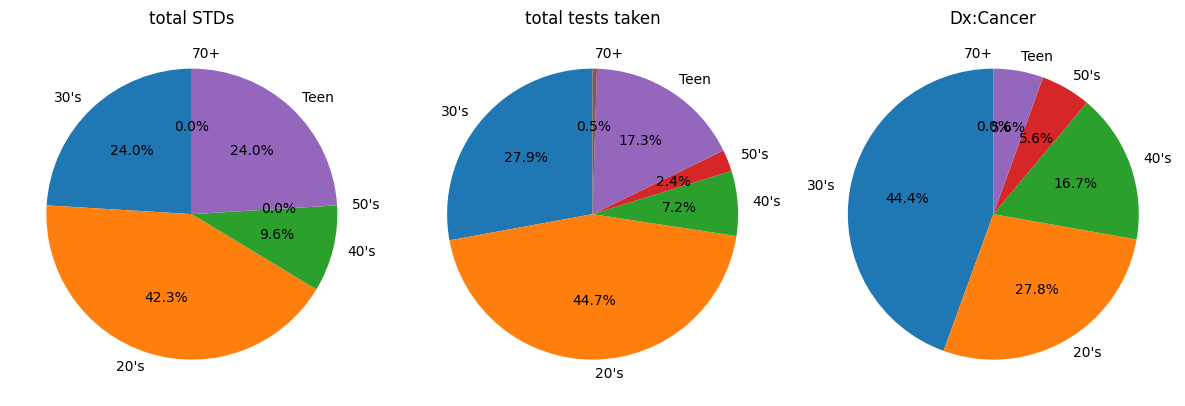

In [13]:
# 1. Pie chart for people having cancer by age category
agecat_cancer = df.groupby(['age_cat'])[['total STDs', 'total tests taken','Dx:Cancer']].aggregate('sum').sort_values(by='Dx:Cancer', ascending=False)

# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Iterate over the columns and plot pie charts
for i, column in enumerate(agecat_cancer.columns):
    # Get the values and labels for the pie chart
    values = agecat_cancer[column].values
    labels = agecat_cancer.index.values

    # Plot the pie chart in the corresponding subplot
    axs[i].pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(column)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

Text(0.5, 1.0, 'Age distribution')

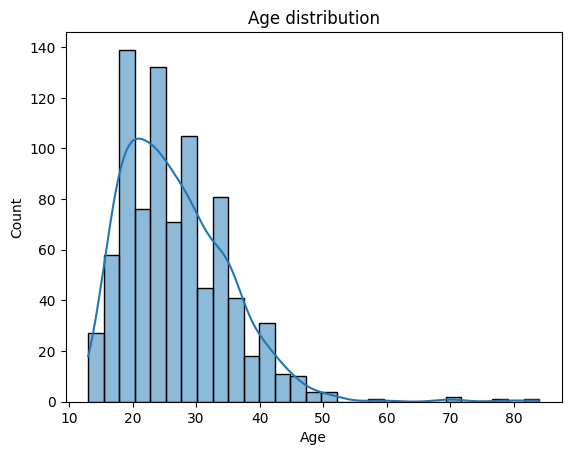

In [14]:
# 2. Age distribution
sns.histplot(data=df, x='Age', kde=True)
plt.title("Age distribution")

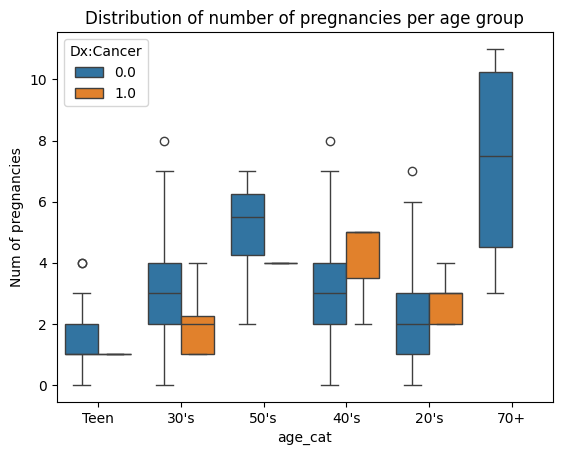

In [15]:
# 3. Pregnancy Distribution by Age
sns.boxplot(data=df, x='age_cat', y='Num of pregnancies', hue='Dx:Cancer')
plt.title("Distribution of number of pregnancies per age group")
plt.show()

Risk factors for cervical cancer include:<br>
From the mayo clinic:<br>
Many sexual partners. The greater your number of sexual partners — and the greater your partner's number of sexual partners — the greater your chance of acquiring HPV.<br>
Early sexual activity. Having sex at an early age increases your risk of HPV.<br>
Other sexually transmitted infections (STIs). Having other STIs — such as chlamydia, gonorrhea, syphilis and HIV/AIDS — increases your risk of HPV.<br>
A weakened immune system. You may be more likely to develop cervical cancer if your immune system is weakened by another health condition and you have HPV.<br>
Smoking. Smoking is associated with squamous cell cervical cancer.<br>
Exposure to miscarriage prevention drug. If your mother took a drug called diethylstilbestrol (DES) while pregnant in the 1950s, you may have an increased risk of a certain type of cervical cancer called clear cell adenocarcinoma.

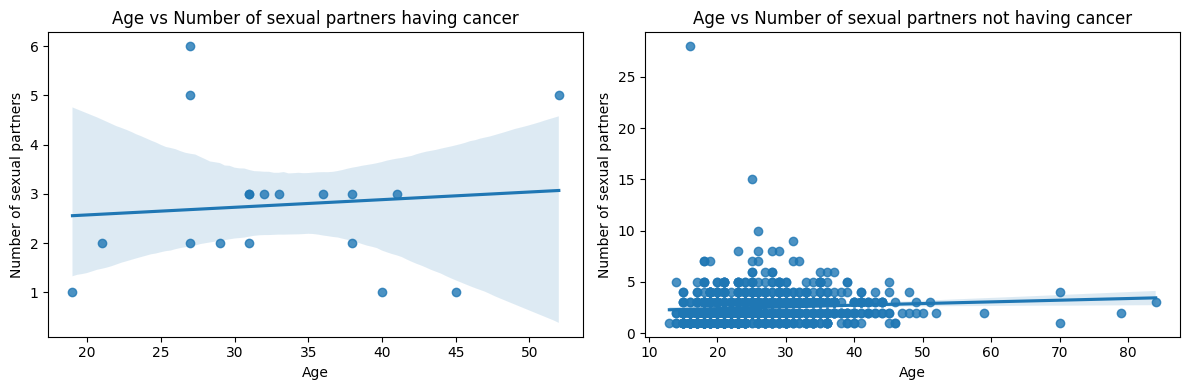

In [16]:
# 4. Age vs Number of Sexual Partners
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sns.regplot(data=df[df['Dx:Cancer']==1], x='Age', y='Number of sexual partners', ax=axs[0])
axs[0].set_title('Age vs Number of sexual partners having cancer')
sns.regplot(data=df[df['Dx:Cancer']==0], x='Age', y='Number of sexual partners', ax=axs[1])
axs[1].set_title('Age vs Number of sexual partners not having cancer')

plt.tight_layout()
plt.show()

From the plots above, we can see that their correlation coefficent very close to 0, this indicates that, from the data, the number of sexual partners does not have any linear relationship with any of the respective diagnoses. However, we also visually tell that the number of sexual partners remained fairly consistent across age ranges and therefore there are more likely causes of HPV and Cervical Cancer than number of sexual partners with respect to the data.

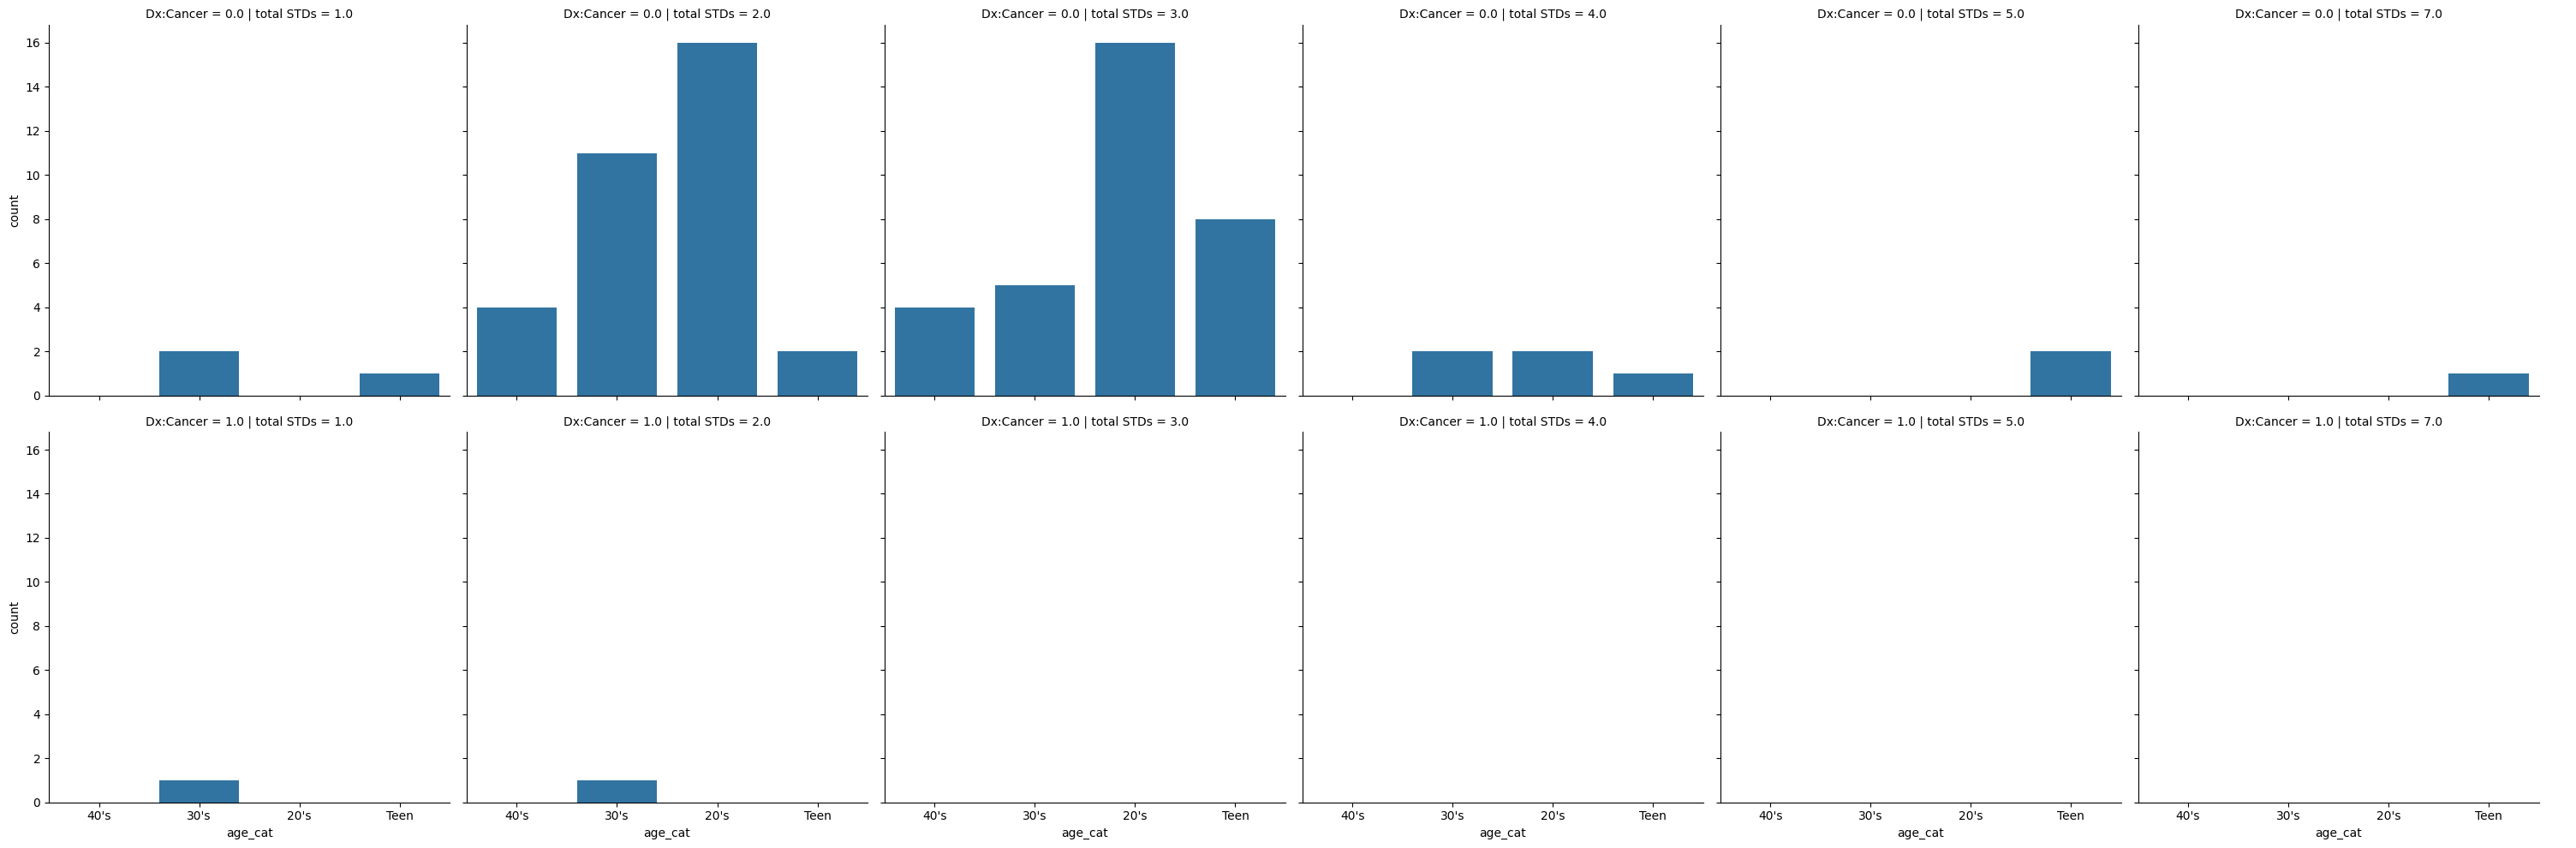

In [17]:
# 5. Count of women across age groups who have had one or more std based on having cancer
sns.catplot(data = df[df['total STDs']>0], x='age_cat', row='Dx:Cancer', col ='total STDs', kind="count")

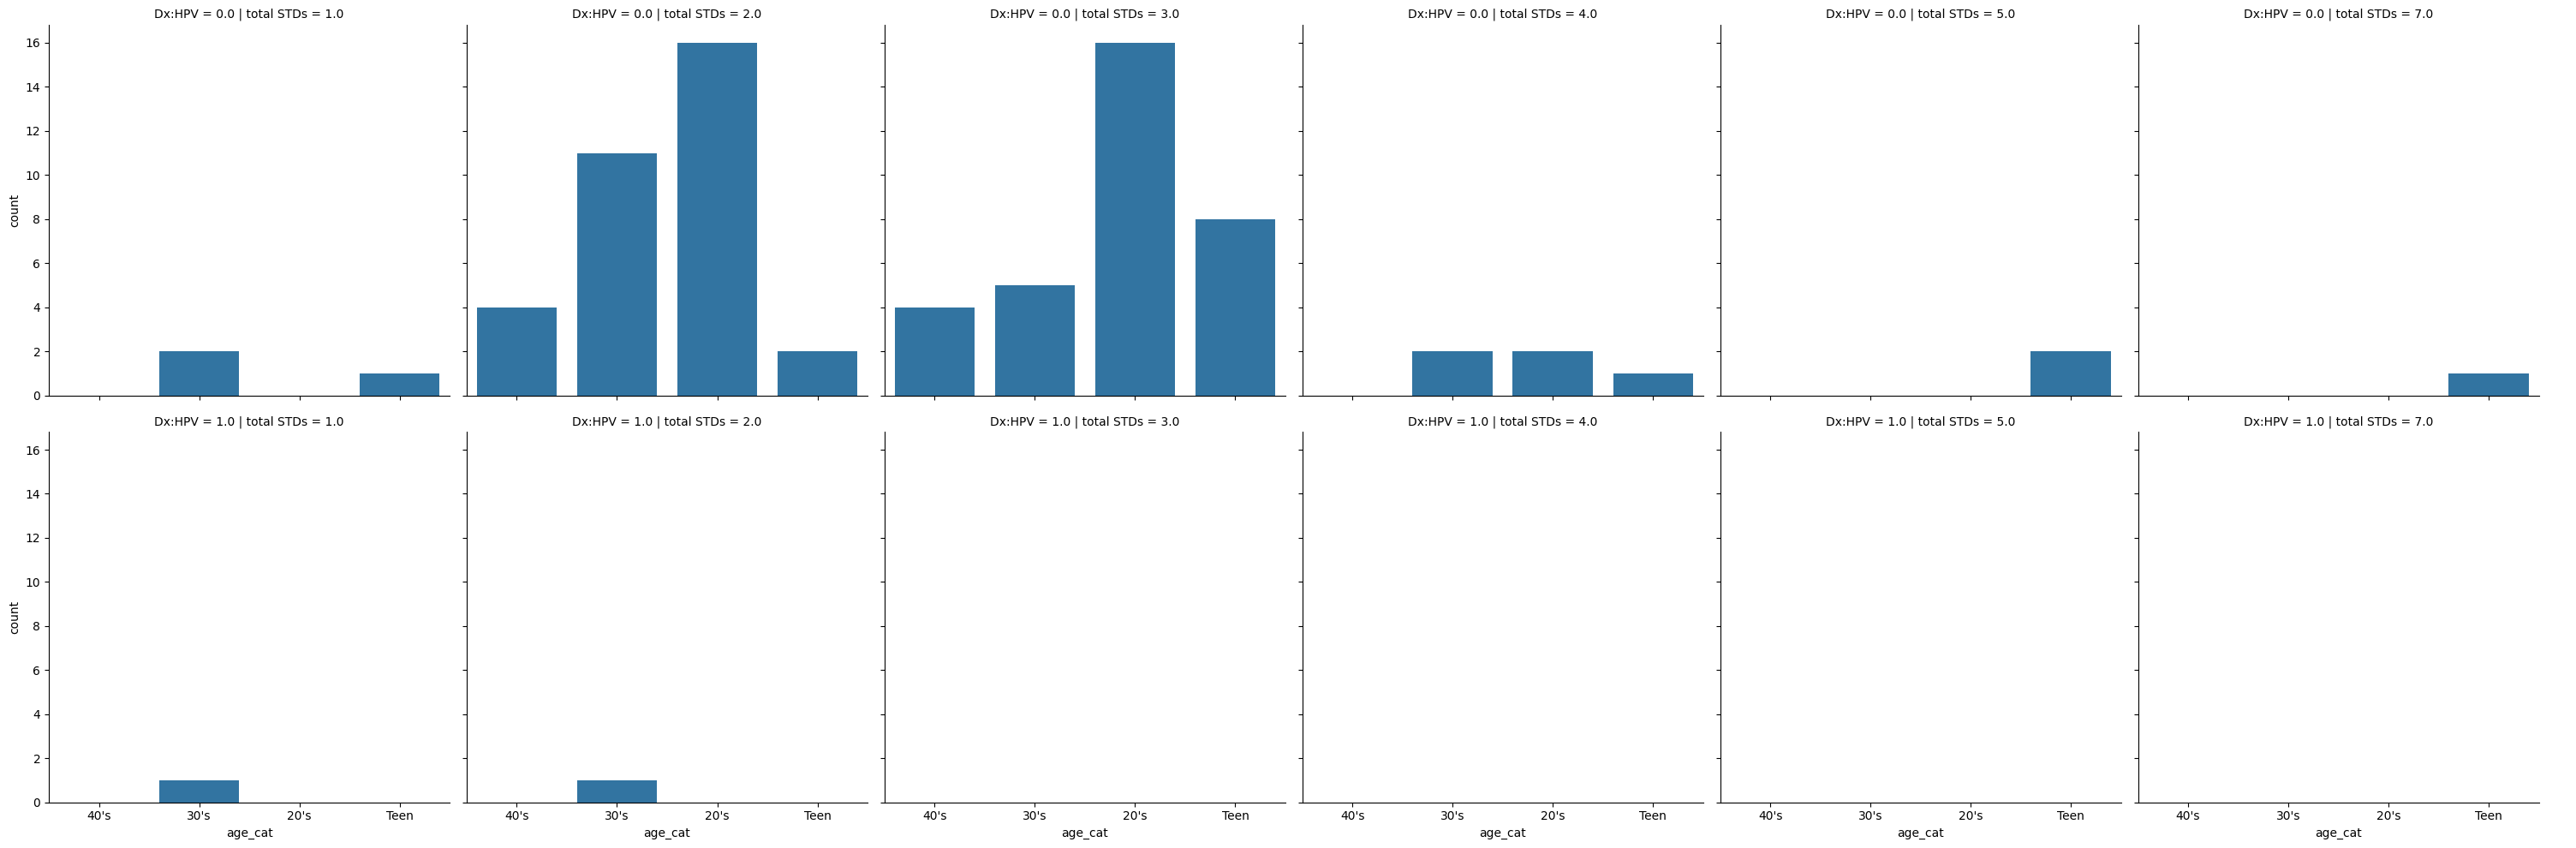

In [18]:
# 6. Count of women across age groups who have had one or more std based on having HPV
sns.catplot(data = df[df['total STDs']>0], x='age_cat', row='Dx:HPV', col ='total STDs', kind="count")

Tests performed on a patient: Hinselmann, Schiller, Citology, Biopsy

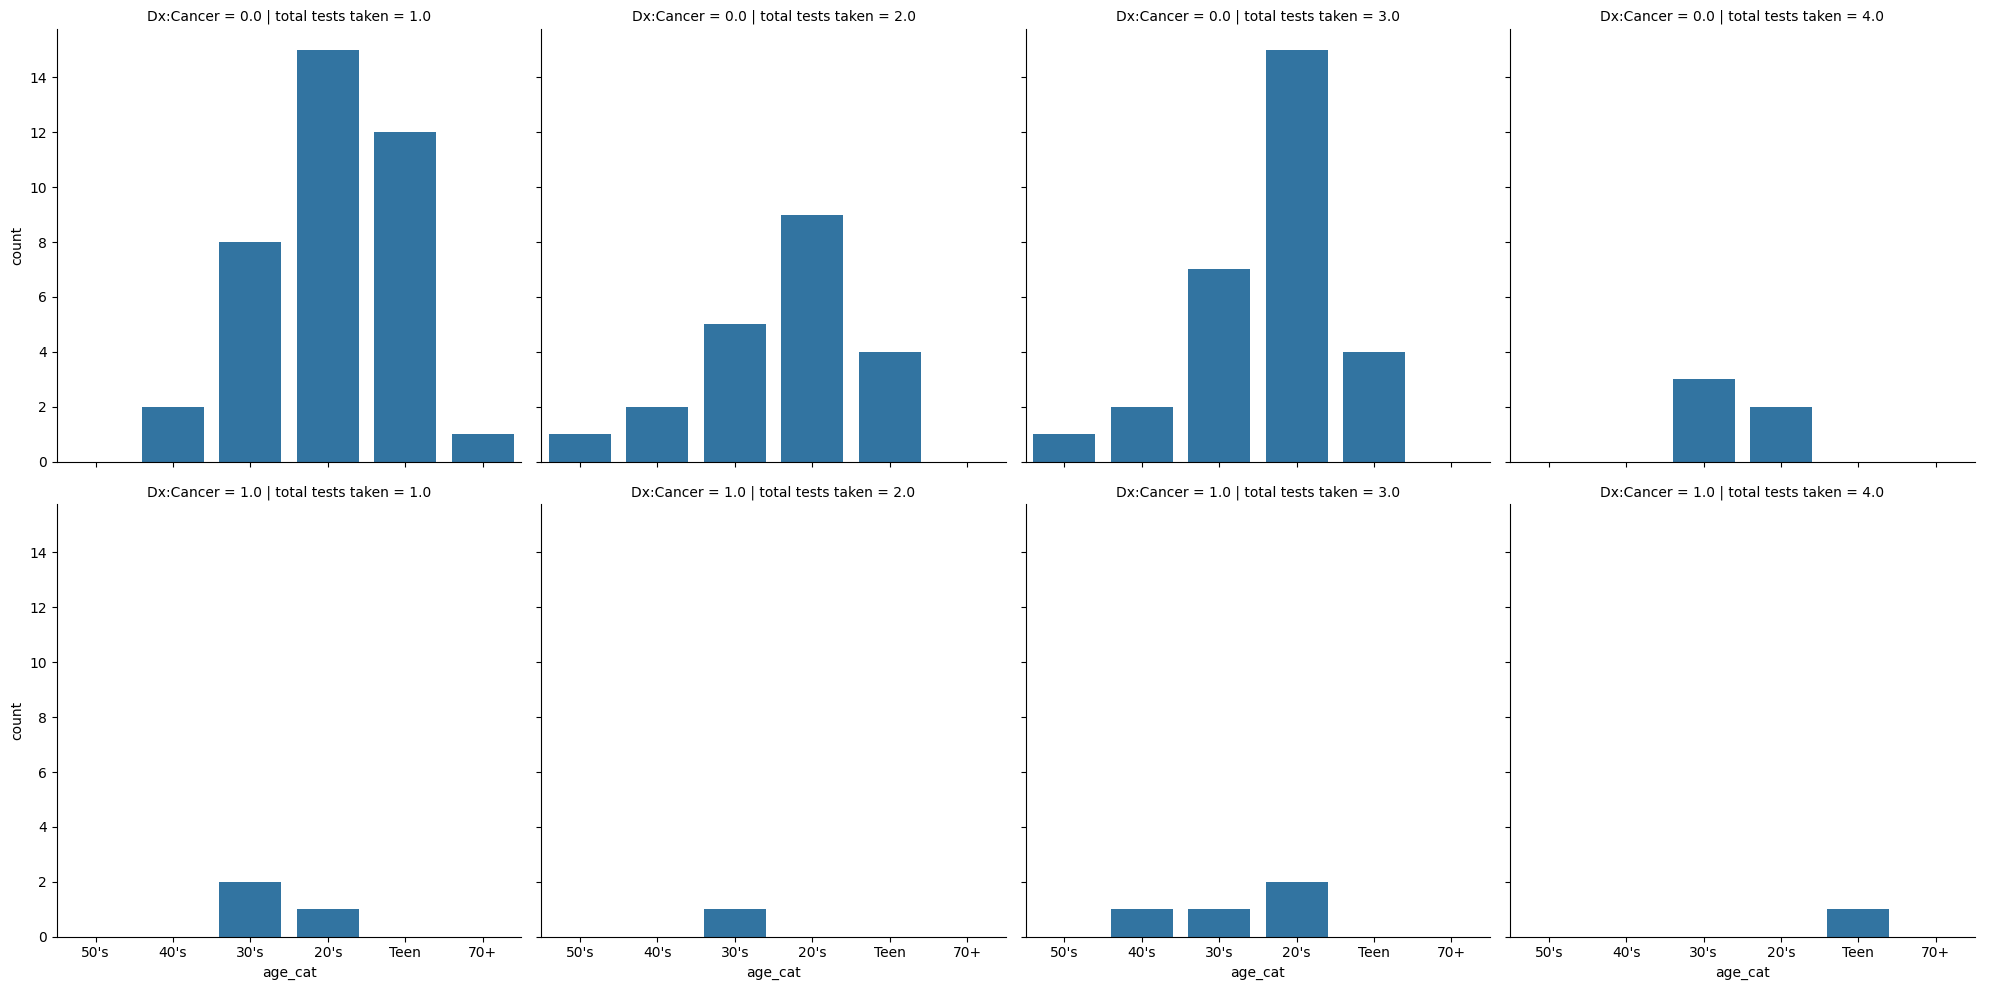

In [19]:
# 7. Count of women across age groups who have had one or more tests taken based on having cancer
sns.catplot(data = df[df['total tests taken']>0], x='age_cat', row='Dx:Cancer', col ='total tests taken', kind="count")

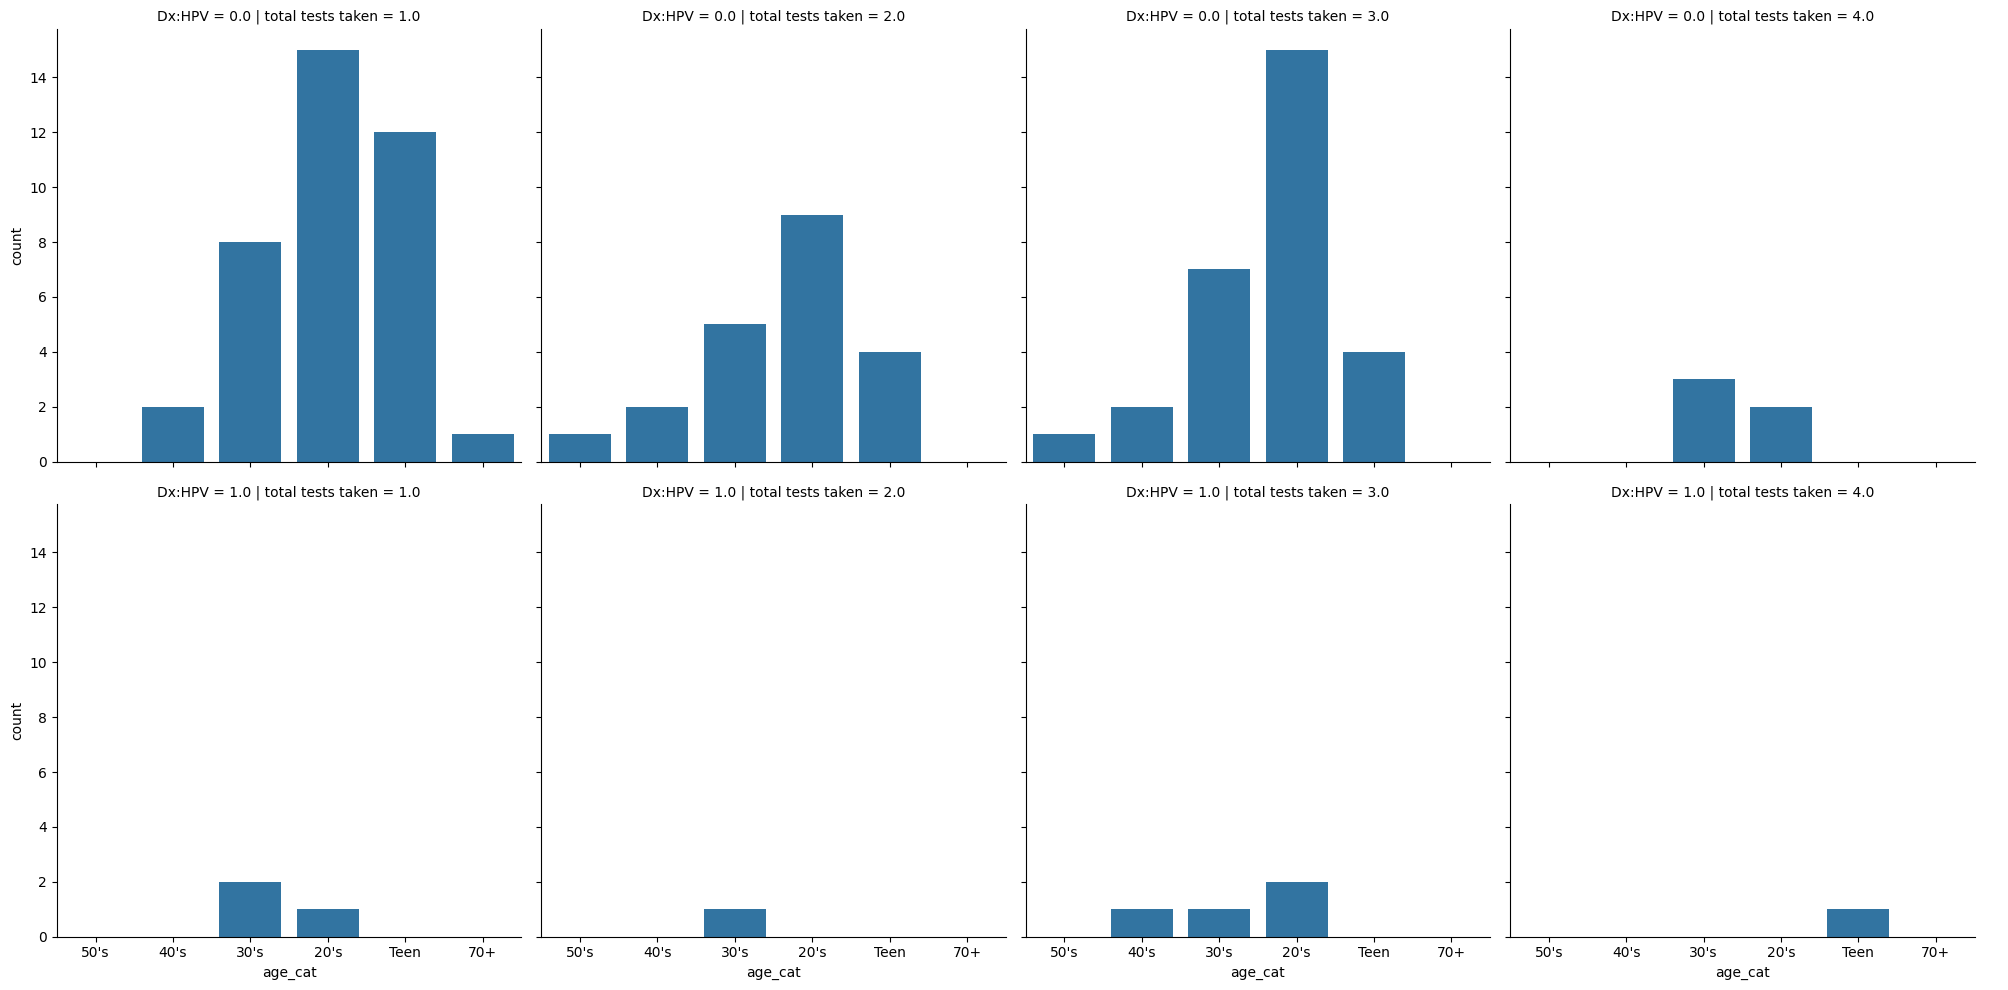

In [20]:
# 8. Count of women across age groups who have had one or more tests taken based on having HPV
sns.catplot(data = df[df['total tests taken']>0], x='age_cat', row='Dx:HPV', col ='total tests taken', kind="count")

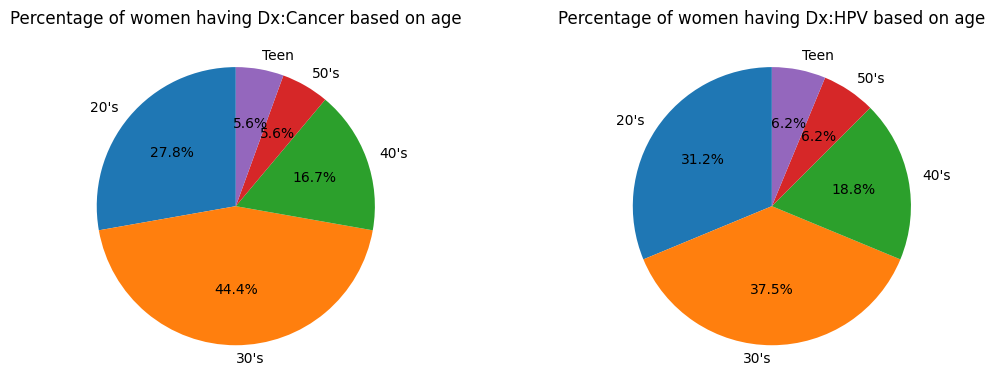

In [21]:
# 9. Percentage of women having cancer and hpv based on age
agecat_cancer = df[df['Dx:Cancer']==1].groupby(['age_cat'])[['Dx:Cancer','Dx:HPV']].aggregate('sum')

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Iterate over the columns and plot pie charts
for i, column in enumerate(agecat_cancer.columns):
    # Get the values and labels for the pie chart
    values = agecat_cancer[column].values
    labels = agecat_cancer.index.values

    # Plot the pie chart in the corresponding subplot
    axs[i].pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'Percentage of women having {column} based on age')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

Contraceptive: IUD, Hormonal contraceptives

In [22]:
df.groupby(['age_cat'])[['IUD','Hormonal Contraceptives']].aggregate('sum')

,IUD,Hormonal Contraceptives
age_cat,,
20's,27.0,283.0
30's,37.0,165.0
40's,15.0,38.0
50's,3.0,2.0
70+,1.0,0.0
Teen,0.0,101.0


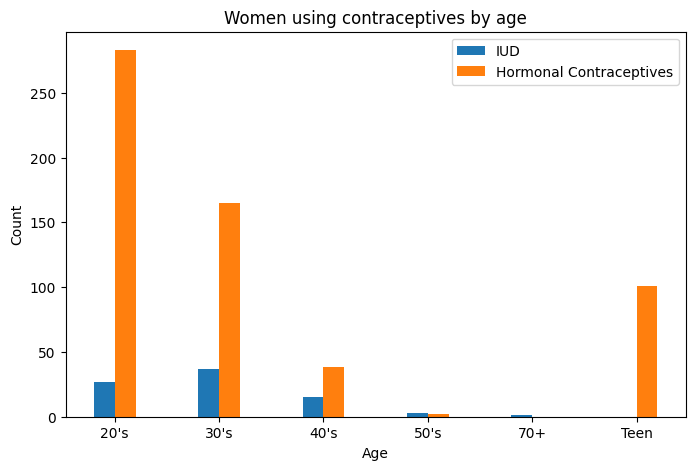

In [23]:
# 10. Women using contraceptives
agecat_contraceptives = df.groupby(['age_cat'])[['IUD','Hormonal Contraceptives']].aggregate('sum')
# Bar plot of evaluation metrics

# Numbers of pairs of bars you want
N = len(agecat_contraceptives.index)

# Data on X-axis
'''
IUD, Hormonal contraceptive
'''
# Specify the values of bars
blue_bar = agecat_contraceptives['IUD']
orange_bar = agecat_contraceptives['Hormonal Contraceptives']

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(8,5))

# Width of a bar
width = 0.2

# Plotting
plt.bar(ind, blue_bar, width, label='IUD')
plt.bar(ind + width, orange_bar, width, label='Hormonal Contraceptives')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Women using contraceptives by age')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, agecat_contraceptives.index.values)

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

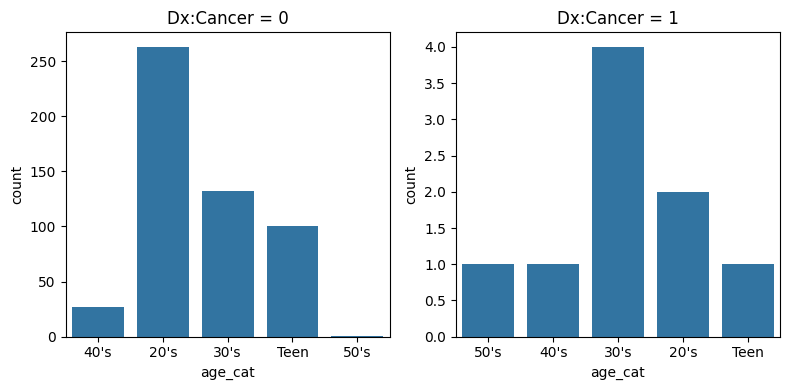

In [24]:
# 11. Age Ranges of women who use Hormonal Contraceptives
agecat_hormonalcontraceptives = df[(df["Hormonal Contraceptives"] == 1) & (df["IUD"] == 0)]

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

sns.countplot(data=agecat_hormonalcontraceptives[agecat_hormonalcontraceptives['Dx:Cancer']==0], x='age_cat', ax=axs[0])
axs[0].set_title('Dx:Cancer = 0')

sns.countplot(data=agecat_hormonalcontraceptives[agecat_hormonalcontraceptives['Dx:Cancer']==1], x='age_cat', ax=axs[1])
axs[1].set_title('Dx:Cancer = 1')

# Adjust the spacing between subplots
plt.tight_layout()
# Display the plot
plt.show()

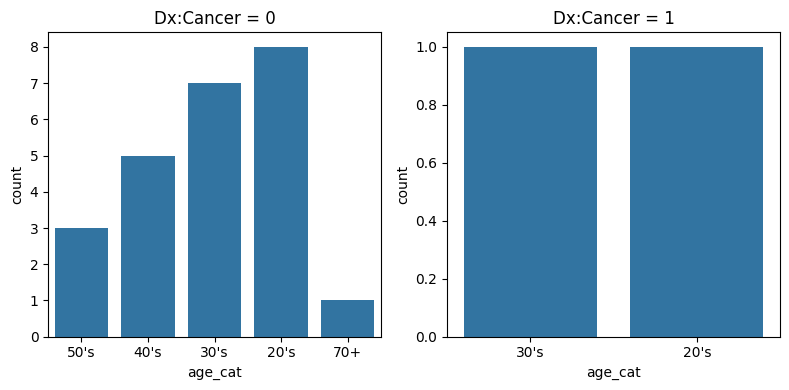

In [25]:
# 12. Age Ranges of women who use IUD
agecat_iud = df[(df["Hormonal Contraceptives"] == 0) & (df["IUD"] == 1)]

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

sns.countplot(data=agecat_iud[agecat_iud['Dx:Cancer']==0], x='age_cat', ax=axs[0])
axs[0].set_title('Dx:Cancer = 0')

sns.countplot(data=agecat_iud[agecat_iud['Dx:Cancer']==1], x='age_cat', ax=axs[1])
axs[1].set_title('Dx:Cancer = 1')

# Adjust the spacing between subplots
plt.tight_layout()
# Display the plot
plt.show()

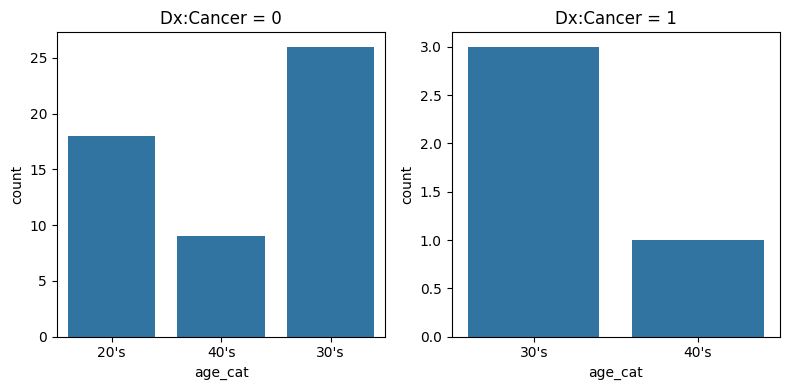

In [26]:
# 13. Age Ranges of women who use both IUD and hormonal contraceptives
agecat_bothcontra = df[(df["Hormonal Contraceptives"] == 1) & (df["IUD"] == 1)]

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

sns.countplot(data=agecat_bothcontra[agecat_bothcontra['Dx:Cancer']==0], x='age_cat', ax=axs[0])
axs[0].set_title('Dx:Cancer = 0')

sns.countplot(data=agecat_bothcontra[agecat_bothcontra['Dx:Cancer']==1], x='age_cat', ax=axs[1])
axs[1].set_title('Dx:Cancer = 1')

# Adjust the spacing between subplots
plt.tight_layout()
# Display the plot
plt.show()

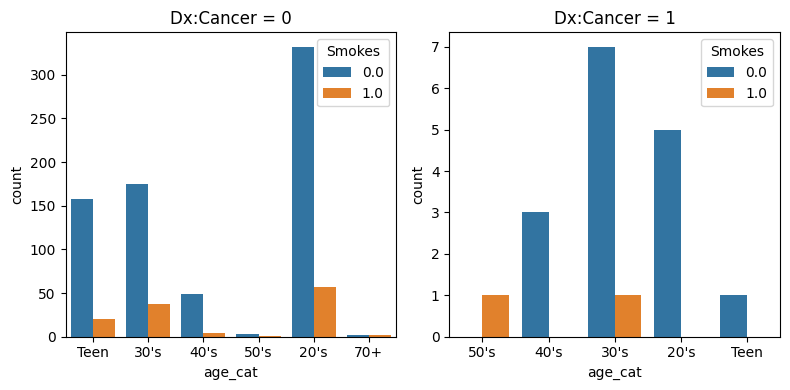

In [27]:
# 14. Age ranges of women who smoke and have cancer
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

sns.countplot(data=df[df['Dx:Cancer']==0], x='age_cat', hue='Smokes', ax=axs[0])
axs[0].set_title('Dx:Cancer = 0')

sns.countplot(data=df[df['Dx:Cancer']==1], x='age_cat', hue='Smokes', ax=axs[1])
axs[1].set_title('Dx:Cancer = 1')

# Adjust the spacing between subplots
plt.tight_layout()
# Display the plot
plt.show()

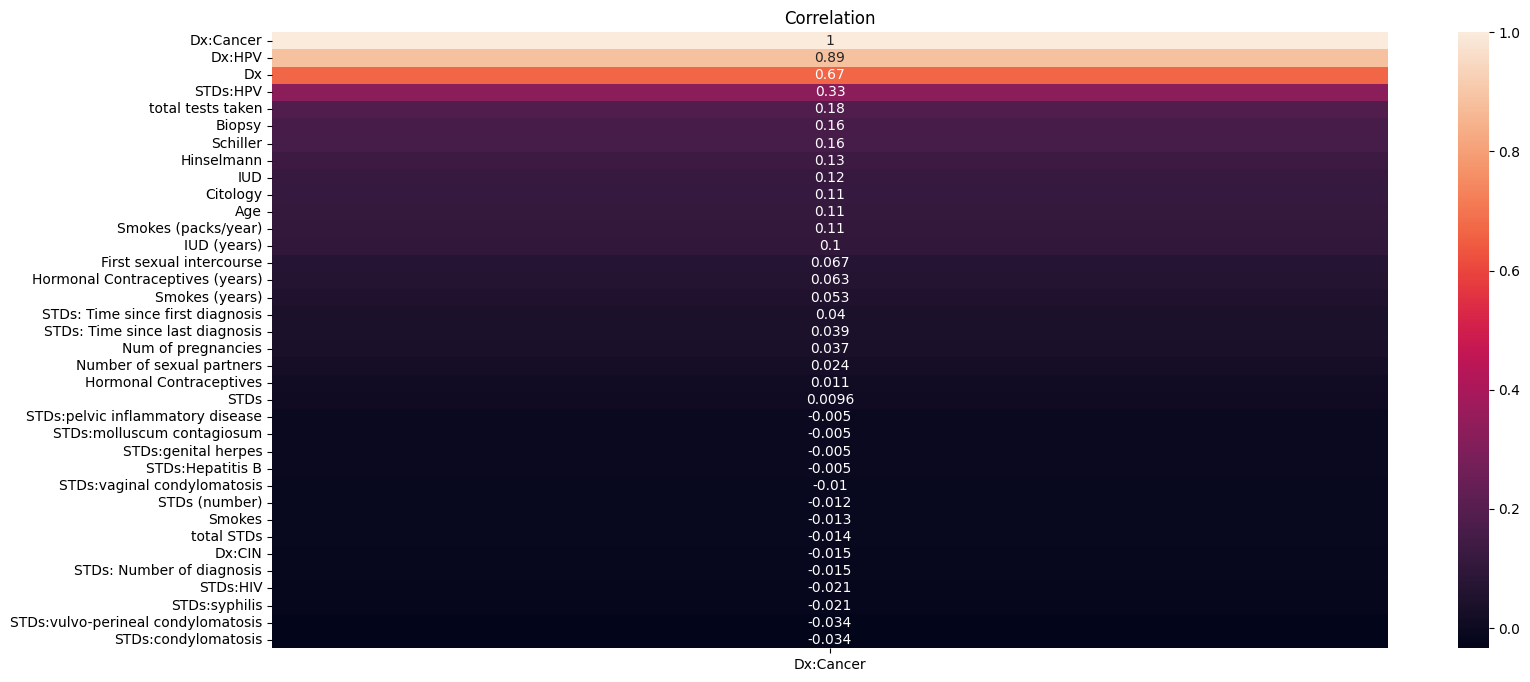

In [28]:
# Correlation:
plt.figure(figsize=(18,8))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr()[['Dx:Cancer']].sort_values(by='Dx:Cancer', ascending=False), annot=True);
plt.title('Correlation')
plt.show()

In [29]:
df['Dx:Cancer'].value_counts()

,count
Dx:Cancer,
0.0,840
1.0,18


Imbalanced Class<br>
The "Dx:Cancer" class is an imbalanced class with just 18 classified as cancer and 840 as not cancer. This roughly translates to 2.1% classified as cancer and 97.9 % classified as not cancer.

There are two main approaches for dealing with imbalanced classes:

Undersampling<br>
Oversampling<br><br>
<p>Undersampling:</p>
<ul>
<li>Random Undersampling</li>
<li>Tomek links for under sampling</li>

</ul>

<p>Undersampling techniques weren't considered as this would lead to a significant loss of information and underperforms against oversampling.</p>
<br>
<p>Oversampling:</p>
<ul>
<li>Synthetic Minority Oversampling Technique (SMOTE)</li>
<li>Adaptive synthetic sampling ( ADASYN)</li>
<li>Random Oversampling</li>
</ul>

## Model building

In [30]:
# Split data:
X = df.drop(["Dx:Cancer", "age_cat"], axis=1)
y = df["Dx:Cancer"]

# Balance data using ADASYN method
adasyn = ADASYN(random_state=42)
X_balanced, y_balanced = adasyn.fit_resample(X,y)
df = X_balanced.join(y_balanced)

# Check the distribution of data
df['Dx:Cancer'].value_counts(normalize=True)*100

,proportion
Dx:Cancer,
0.0,50.089445
1.0,49.910555


In [31]:
X = df.drop(["Dx:Cancer"], axis=1)
y = df["Dx:Cancer"]

# Scale independent features
scale = StandardScaler()
X_scaled = scale.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)

# Splitting data into training and testing set

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)
print('Number of instances in training set: ', X_train.shape[0])
print('Number of instances in testing set: ', X_test.shape[0])

Number of instances in training set:  1257
Number of instances in testing set:  420


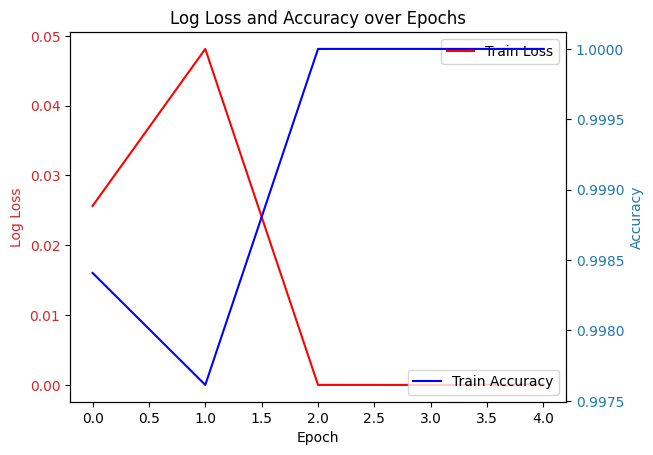

In [32]:

# Initialize the SGD Classifier with 'log_loss', which performs logistic regression
sgd_clf = SGDClassifier(loss='log_loss', max_iter=1, warm_start=True, random_state=42)

n_epochs = 5
train_losses = []
train_accuracies = []



# Training the model and logging loss and accuracy at each epoch
for epoch in range(n_epochs):
    sgd_clf.fit(X_train, y_train)  # Train for one epoch

    # Predict probabilities for log loss
    y_train_pred_proba = sgd_clf.predict_proba(X_train)[:, 1]

    # Log loss (cross-entropy)
    train_loss = log_loss(y_train, y_train_pred_proba)
    train_losses.append(train_loss)


    # Accuracy
    train_acc = accuracy_score(y_train, sgd_clf.predict(X_train))

    # Store the results

    train_accuracies.append(train_acc)
# Plot the Loss and Accuracy over Epochs
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Log Loss', color=color)
ax1.plot(range(n_epochs), train_losses, label='Train Loss', color='red')

ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper right')


ax2 = ax1.twinx()  # Instantiate a second y-axis that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color)
ax2.plot(range(n_epochs), train_accuracies, label='Train Accuracy', color='blue')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='lower right')

plt.title('Log Loss and Accuracy over Epochs')
plt.show()


In [33]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'SVC']

def calculate_evaluation_metrics(ytest, ypred, ypredproba):
  acc = accuracy_score(ytest, ypred)
  prec = precision_score(ytest, ypred)
  rec = recall_score(ytest, ypred)
  f1 = 2 * (prec * rec) / (prec + rec)
  auc = roc_auc_score(ytest, ypredproba)
  fpr, tpr, _ = roc_curve(ytest, ypredproba)
  return acc, prec, rec, f1, auc, fpr, tpr

def conf_mat_roc(ytest, ypred, fpr, tpr, auc, title):
  # Create a figure with two subplots
  fig, axs = plt.subplots(1, 2, figsize=(10, 4))

  # Confusion matrix plot
  cm = confusion_matrix(ytest, ypred)
  #axs[0] = plt.subplot()
  sns.heatmap(cm, annot=True, fmt='g', ax=axs[0])  #annot=True to annotate cells, ftm='g' to disable scientific notation

  # labels, title and ticks
  axs[0].set_xlabel('Predicted labels')
  axs[0].set_ylabel('True labels')
  axs[0].set_title(f'{title}: Confusion Matrix')

  # 0 = No Cancer, 1 = Cancer
  axs[0].xaxis.set_ticklabels(['No Cancer = 0', 'Cancer = 1'])
  axs[0].yaxis.set_ticklabels(['No Cancer = 0', 'Cancer = 1'])

  # ROC curve
  axs[1].plot(fpr, tpr, label=f'{title} (AUC = {auc:.2f})')

  # Plot guessing line
  axs[1].plot([0, 1], [0, 1], 'k--', label='Random Guessing')

  # Setting plot labels and title
  axs[1].set_xlabel('FPR')
  axs[1].set_ylabel('TPR')
  axs[1].set_title(f'{title}: ROC Curve')
  axs[1].legend(loc='lower right')

  plt.tight_layout()
  plt.show()

Accuracy: 0.9976190476190476
F1 Score: 0.9976359338061466
Precision: 0.9952830188679245
Recall: 1.0
AUC Score: 0.997278849860541


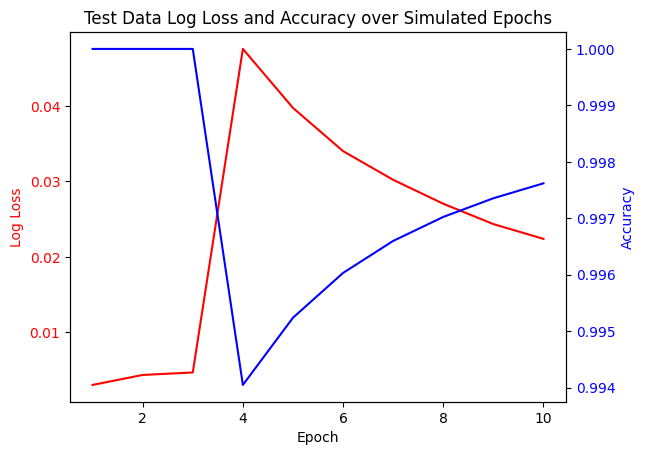

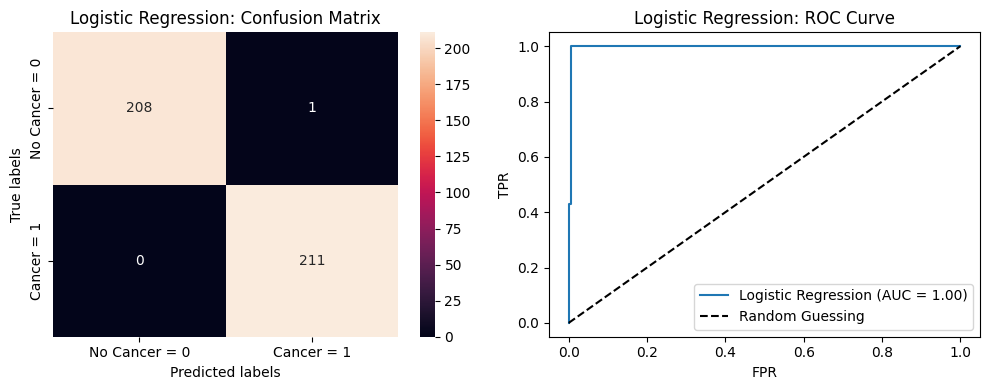

In [34]:
# ML1: Logistic Regression
# Create and fit the logistic regression model
lm_model = LogisticRegression()
lm_model.fit(X_train, y_train)

# Make predictions on the test set
lm_y_pred = lm_model.predict(X_test)
lm_y_pred_proba = lm_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
lm_acc, lm_prec, lm_rec, lm_f1, lm_auc, lm_fpr, lm_tpr = calculate_evaluation_metrics(y_test, lm_y_pred, lm_y_pred_proba)

# Define a number of "epochs" for illustration purposes
epochs = 10
chunk_size = len(X_test) // epochs

# Initialize lists to store accuracy and loss for each epoch
test_losses = []
test_accuracies = []

for i in range(1, epochs + 1):
    # Simulate the process over 'epochs' by taking the first i * chunk_size samples
    X_test_chunk = X_test[:i * chunk_size]
    y_test_chunk = y_test[:i * chunk_size]

    # Make predictions
    y_pred_chunk = lm_model.predict(X_test_chunk)
    y_pred_proba_chunk = lm_model.predict_proba(X_test_chunk)[:, 1]

    # Calculate accuracy and log loss
    lm_acc = accuracy_score(y_test_chunk, y_pred_chunk)
    lm_loss = log_loss(y_test_chunk, y_pred_proba_chunk)

    # Store them
    test_accuracies.append(lm_acc)
    test_losses.append(lm_loss)


epochs = range(1, epochs + 1)

fig, ax1 = plt.subplots()

# Plot test loss
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Log Loss', color='red')
ax1.plot(epochs, test_losses, 'r-', label='Test Loss')
ax1.tick_params(axis='y', labelcolor='red')

# Create a second y-axis to plot test accuracy
ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', color='blue')
ax2.plot(epochs, test_accuracies, 'b-', label='Test Accuracy')
ax2.tick_params(axis='y', labelcolor='blue')

# Add title and show plot
plt.title('Test Data Log Loss and Accuracy over Simulated Epochs')

# Evaluation metrics
print("Accuracy:", lm_acc)
print("F1 Score:", lm_f1)
print("Precision:", lm_prec)
print("Recall:", lm_rec)
print("AUC Score:", lm_auc)
conf_mat_roc(y_test, lm_y_pred, lm_fpr, lm_tpr, lm_auc, models[0])

Accuracy: 0.9952380952380953
F1 Score: 0.9952830188679246
Precision: 0.9906103286384976
Recall: 1.0
AUC Score: 0.9952153110047847


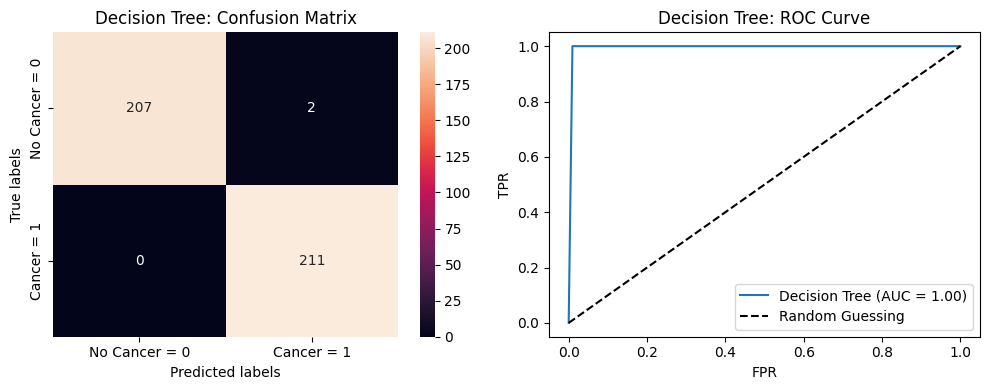

In [35]:
# ML2: Decision Tree
# Create and fit the DecisionTreeClassifier model
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, y_train)

# Make predictions on the test set
dtc_y_pred = dtc_model.predict(X_test)
dtc_y_pred_proba = dtc_model.predict_proba(X_test)[:, 1]


# Calculate evaluation metrics
dtc_acc, dtc_prec, dtc_rec, dtc_f1, dtc_auc, dtc_fpr, dtc_tpr = calculate_evaluation_metrics(y_test, dtc_y_pred, dtc_y_pred_proba)

print("Accuracy:", dtc_acc)
print("F1 Score:", dtc_f1)
print("Precision:", dtc_prec)
print("Recall:", dtc_rec)
print("AUC Score:", dtc_auc)
conf_mat_roc(y_test, dtc_y_pred, dtc_fpr, dtc_tpr, dtc_auc, models[1])

Accuracy: 0.9976190476190476
F1 Score: 0.9976359338061466
Precision: 0.9952830188679245
Recall: 1.0
AUC Score: <function auc at 0x7c0ab5824ee0>


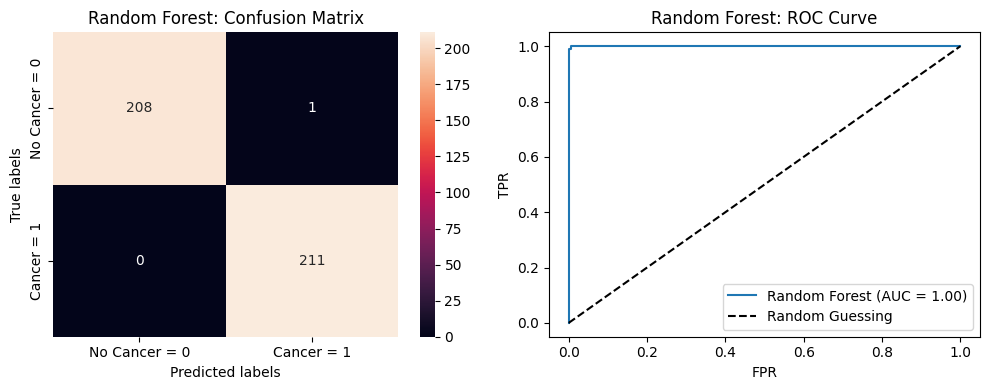

In [36]:
# ML3: Random Forest
# Create an RandomForestClassifier model
ranfor_model = RandomForestClassifier()

# Train the model
ranfor_model.fit(X_train, y_train)

# Make predictions on the test set
rf_y_pred = ranfor_model.predict(X_test)
proba = ranfor_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
rf_acc, rf_prec, rf_rec, rf_f1, rf_auc, rf_fpr, rf_tpr = calculate_evaluation_metrics(y_test, rf_y_pred, proba)

print("Accuracy:", rf_acc)
print("F1 Score:", rf_f1)
print("Precision:", rf_prec)
print("Recall:", rf_rec)
print("AUC Score:", auc)
conf_mat_roc(y_test, rf_y_pred, rf_fpr, rf_tpr, rf_auc, models[2])

Accuracy: 0.9976190476190476
F1 Score: 0.9976359338061466
Precision: 0.9952830188679245
Recall: 1.0
AUC Score: 0.9985487199256219


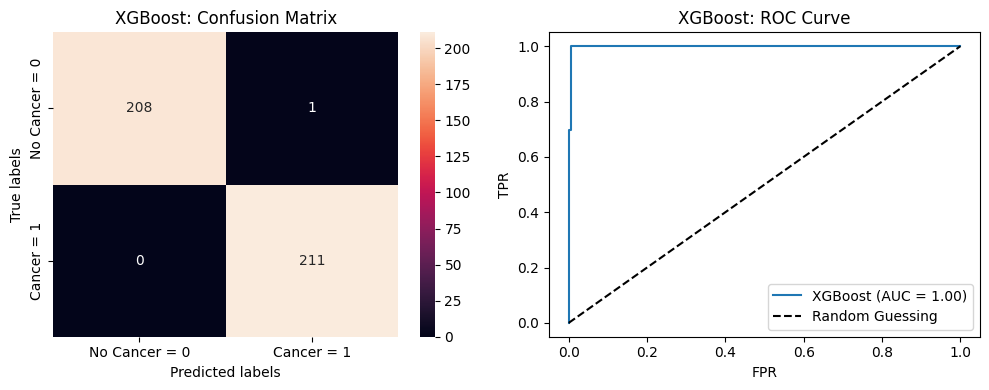

In [37]:
# ML4: XGBoost
# Create an XGBClassifier model
xgb_model = XGBClassifier()

# Train the model
xgb_model.fit(X_train, y_train)


# Make predictions on the test set
xgb_y_pred = xgb_model.predict(X_test)
proba = xgb_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
xgb_acc, xgb_prec, xgb_rec, xgb_f1, xgb_auc, xgb_fpr, xgb_tpr = calculate_evaluation_metrics(y_test, xgb_y_pred, proba)

print("Accuracy:", xgb_acc)
print("F1 Score:", xgb_f1)
print("Precision:", xgb_prec)
print("Recall:", xgb_rec)
print("AUC Score:", xgb_auc)
conf_mat_roc(y_test, xgb_y_pred, xgb_fpr, xgb_tpr, xgb_auc, models[3])

Accuracy: 0.9976190476190476
F1 Score: 0.9976359338061466
Precision: 0.9952830188679245
Recall: 1.0
AUC Score: 0.9968026485861358


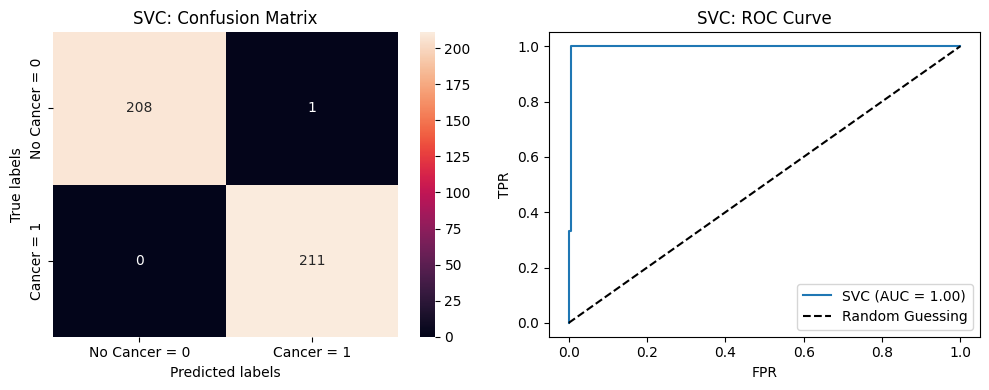

In [38]:
# ML5: SVC

# Create and fit the Support Vector Classifier model
svc_model = SVC(probability=True)
svc_model.fit(X_train, y_train)

# Make predictions on the test set
svc_y_pred = svc_model.predict(X_test)
svc_y_pred_proba = svc_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
svc_acc, svc_prec, svc_rec, svc_f1, svc_auc, svc_fpr, svc_tpr = calculate_evaluation_metrics(y_test, svc_y_pred, svc_y_pred_proba)

print("Accuracy:", svc_acc)
print("F1 Score:", svc_f1)
print("Precision:", svc_prec)
print("Recall:", svc_rec)
print("AUC Score:", svc_auc)
conf_mat_roc(y_test, svc_y_pred, svc_fpr, svc_tpr, svc_auc, models[4])

# Comparing all the Models

           Logistic Regression  Decision Tree  Random Forest   XGBoost  \
Accuracy              0.997619       0.995238       0.997619  0.997619   
Precision             0.995283       0.990610       0.995283  0.995283   
Recall                1.000000       1.000000       1.000000  1.000000   
F1 Score              0.997636       0.995283       0.997636  0.997636   
AUC                   0.997279       0.995215       0.999955  0.998549   

                SVC  
Accuracy   0.997619  
Precision  0.995283  
Recall     1.000000  
F1 Score   0.997636  
AUC        0.996803  


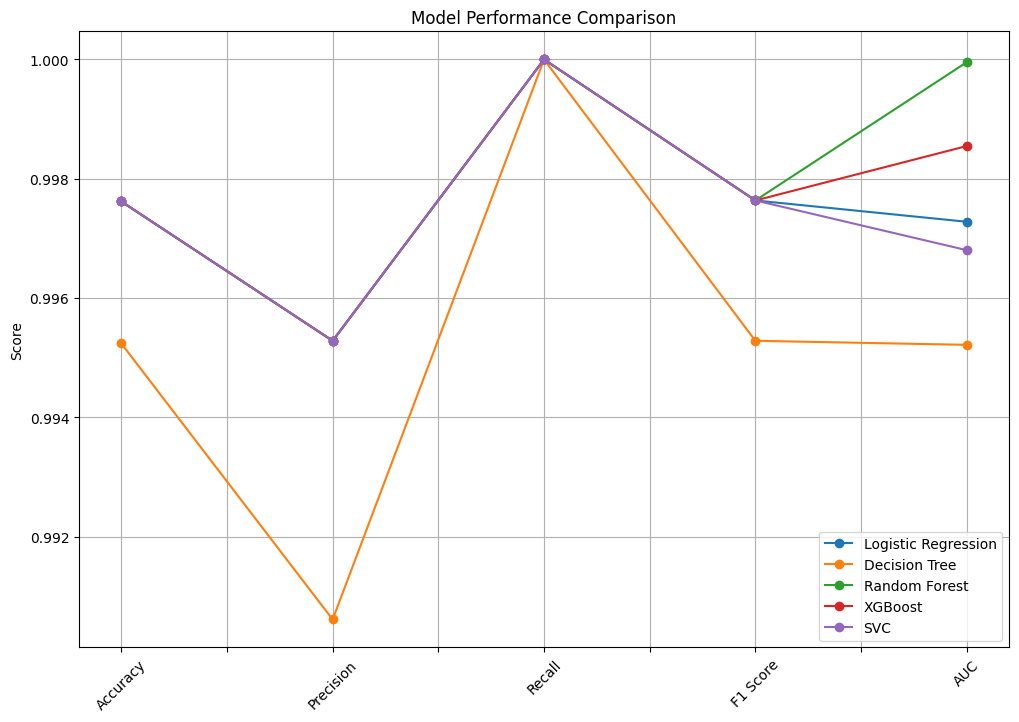

In [39]:
# Dictionary to store evaluation metrics for each model
model_per = {
    'Logistic Regression': {'Accuracy': lm_acc,'Precision': lm_prec,'Recall': lm_rec,'F1 Score': lm_f1,'AUC': lm_auc},
    'Decision Tree': {'Accuracy': dtc_acc,'Precision': dtc_prec,'Recall': dtc_rec,'F1 Score': dtc_f1,'AUC': dtc_auc},
    'Random Forest': {'Accuracy': rf_acc,'Precision': rf_prec,'Recall': rf_rec,'F1 Score': rf_f1,'AUC': rf_auc},
    'XGBoost': {'Accuracy': xgb_acc,'Precision': xgb_prec,'Recall': xgb_rec,'F1 Score': xgb_f1,'AUC': xgb_auc},
    'SVC': {'Accuracy': svc_acc,'Precision': svc_prec,'Recall': svc_rec,'F1 Score': svc_f1,'AUC': svc_auc}
}

# Convert the dictionary to a DataFrame for better visualization
df_per = pd.DataFrame(model_per)
print(df_per)
# plotting line graph
df_per.plot(kind='line', marker='o', figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='lower right')
plt.show()